# Lesson 1: Data Analysis Process

## 01 Introduction
- Data Analyst is someone who uses data to answer questions
- Using data to answer questions like
    - What makes students more likely to submit their projects
    - What countries around the world have the highest and lowest employment rates
    - How does subway ridership vary by location, time of day and weather conditions
- Learn to use libraries that will make data analysis a lot easier
    - Numpy
    - Pandas
    - Matplotlib

## 02 - Problems Solved by Data Analysts
Hearing Data analysis people generally think person working in tech company & Silicon valley. But it is not necessary. It is used outside tech companies also.

Tech-y systems
- Netflix uses it for providing personalized movie recommendations
- facebook uses them in their news feed ranking algorithm
- okcupid uses it to provide good romantic matches

Resources
* [Paper by Facebook on exposure to ideologically diverse information](https://research.facebook.com/publications/1629735407303857/exposure-to-ideologically-diverse-information-on-facebook/)
* [OKCupid blog post on the best questions to ask on a first date](http://blog.okcupid.com/index.php/the-best-questions-for-first-dates/)
* [How Walmart used data analysis to increase sales](http://www.dezyre.com/article/how-big-data-analysis-helped-increase-walmart-s-sales-turnover/109)
* [How Bill James applied data analysis to baseball](https://en.wikipedia.org/wiki/Bill_James)
* [A pharmaceutical company uses data analysis to predict which chemical compounds are likely to make effective drugs](http://www.numerate.com/numerates-ranking-technology-pharmaceutical-rd-gains-u-s-patent/)

## 03 - Data Analysis Process
1. Question
    - starts with
        - question that you want to answer
        - a problem that you want to solve
2. Wrangle
    1. Data acquisiton
        - find that which is needed for answering the question
    2. Data cleaning
        - cleaning up any problems that you find
3. Explore
    - getting familiar with data
    - build intuition
    - finding patterns
4. Draw Conclusions or make predictions
    - example
        - Prediction: Netflix needs to find which movies the users will like
        - Conclusion: Facebook found that users are less likely to click some articles
    - Usually requires machine learning or statistics
5. Communicate
    - finding as useful as your ability to share them
    - many ways to do this
    - visualization is almost always useful
    
Not always straight forward process. We keep on exploring and need to wrangle more.

![](data_analysis_process.png)


We may also need to go back to the question as we get more familiar with the data

![](data_analysis_process2.png)

## Installation and common instructions
- [Anaconda download](http://continuum.io/downloads)
- If you have Anaconda already installed
    - `conda update conda`
    - `conda update anaconda`
- Running iPython notebook
    - `jupyter notebook ipython_notebook_tutorial.ipynb`


## 04 - Intro to CSVs (Comma Separated Values)
- Easier to process than other formats like xls

## 05 - CSVs in Python

In [1]:
## As list of rows

# Option 1: Each row is a list
csv = [
    ['A1', 'A2'],
    ['B1', 'B2']
]

print csv

# Option 2: Each row is a dictionary
# Better if your csv has a header
csv = [
    {'name': 'Aseem', 'age': '25'},
    {'name': 'Aseem', 'age': '25'}
]

print csv

[['A1', 'A2'], ['B1', 'B2']]
[{'age': '25', 'name': 'Aseem'}, {'age': '25', 'name': 'Aseem'}]


## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print daily_engagement[0]
print "\n"
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


[This page](https://docs.python.org/2/library/csv.html) contains documentation for Python's csv module. Instead of csv, you'll be using unicodecsv in this course. unicodecsv works exactly the same as csv, but it comes with Anaconda and has support for unicode. The csv documentation page is still the best way to learn how to use the unicodecsv library, since the two libraries work exactly the same way.

[This page](https://www.codementor.io/python/tutorial/python-generators-and-iterators) explains the difference between iterators and lists in Python, and how to use iterators.

## 07 - Fixing Data Types
`csv` module reads every value as a string rather than actual data types. This could be confusing. Hence, it is better to fix this now rather than waiting for later.

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
def to_float(record, key):
    record[key] = float(record[key])

def to_int(record, key):
    record[key] = int(float(record[key]))

# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    to_int(engagement_record, 'lessons_completed')
    to_int(engagement_record, 'num_courses_visited')
    to_int(engagement_record, 'projects_completed')
    to_float(engagement_record, 'total_minutes_visited')
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Questions
- How long to submit projects?
- How do students who submit their projects different from the students who don't?

## 10 Investigating the Data

We will run some numbers to get some understanding about the data.

For removing an element from a dictionary, [this post](http://stackoverflow.com/questions/5844672/delete-an-element-from-a-dictionary) might be helpful

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

# NOTE Added later after finding the problems in the data
for engagement_record in daily_engagement:
    # Rename the "acct" column in the daily_engagement table to "account_key".
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
    
def unique_accounts(data):
    result = set()
    for row in data:
        result.add(row['account_key'])
    return result

def print_total_and_unique(name, data):
    print "total {0} = {1}, unique {2}".format(name, len(data), len(unique_accounts(data)))

print_total_and_unique("enrollments", enrollments)
print_total_and_unique("daily engagements", daily_engagement)
print_total_and_unique("project submissions", project_submissions)

total enrollments = 1640, unique 1302
total daily engagements = 136240, unique 1237
total project submissions = 3642, unique 743


- The reason total enrollments and unique enrollments are different is that students can enroll, cancel and then re-enroll
- There are much more daily engagegement (136240) compared to enrollments. That is expected as each student will have an entry for every day

## 11 Problems in the Data
- The number of unique engagements are not the same as unique enrollments. It should be as engagement table is supposed to contain a row for each day a student was enrolled in the course
- Engagement table has `acct` while other two tables have `account_key`. Renamed this so that we can use a single function instead of copy pasting code

## 13 - Missing Engagement Records
- Why are students missing from engagement table?
- If there is something in your data that you don't understand it is important to spend time and understand that 
    - as  we could be missing something important
    - cannot trust your results 
    
### Investigating problems
1. Identify surprising points
2. Print out a few data points

We will print one account without daily engagement data and one account with daily engagement data. Then we will compare and see if we can find anything

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student 
## is missing from the daily engagement table.
## Output that enrollment.


def get_one(data):
    for row in data:
        return row

def get_account_data(data, account_key):
    for row in data:
        if row['account_key'] == account_key:
            return row

def audit_all_enrollment_should_have_engagement(enrollments, engagements):
    unique_enrollments = unique_accounts(enrollments)
    unique_daily_engagement = unique_accounts(engagements)

    missing_engagements = unique_enrollments - unique_daily_engagement
    present_engagements = unique_enrollments - missing_engagements

    print "missing \n {}".format(
        get_account_data(enrollments, get_one(missing_engagements))
    )
    print ""
    print "present \n {}".format(
        get_account_data(enrollments, get_one(present_engagements))
    )
    
audit_all_enrollment_should_have_engagement(enrollments, daily_engagement)

missing 
 {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}

present 
 {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 3, 0, 0), u'account_key': u'723', u'cancel_date': datetime.datetime(2015, 4, 6, 0, 0), u'days_to_cancel': 3}


I notice that `is_udacity` is `True` for the missing record while it is `False` for the present record.

The instructor talks with a Udacity Data Scientist and they share that for these are Udacity test accounts and they may not have data in the daily engagement table.

So we will go ahead and remove these test accounts from the data set.

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, 
# removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


At this point we repeat and ensure that this will all of the surprises related to our earlier observation. This is a common process that we need to do during data analysis.

![](investigate.png)


## Checking for More Problem Records
So we run the earlier code again and ensure that we do not gave any more surprises

In [13]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
print_total_and_unique("enrollments", non_udacity_enrollments)
print_total_and_unique("daily engagements", non_udacity_engagement)

total enrollments = 1622, unique 1296
total daily engagements = 135656, unique 1234


## Tracking Down the Remaining Problems
We see that we still have something left in the data that we are not quite sure about as the unique numbers still do not match. So we repeat and try to find what problem still remains.

In [14]:
audit_all_enrollment_should_have_engagement(non_udacity_enrollments, non_udacity_engagement)

missing 
 {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 7, 0, 0), u'account_key': u'1129', u'cancel_date': datetime.datetime(2015, 3, 7, 0, 0), u'days_to_cancel': 0}

present 
 {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 3, 0, 0), u'account_key': u'723', u'cancel_date': datetime.datetime(2015, 4, 6, 0, 0), u'days_to_cancel': 3}


- Looking at the above data we see that `days_to_cancel` is 0 for the missing account. 
- The `join_date` is the same as `cancel_date`. 
- Probably a person needs to be enrolled at least a day for there to be an engagement record.

Now we repeat to see if excluding these account we can no more surprises. For this we need to firstly filter these people out.

In [15]:
#Make a list of people who cancelled the same day
people_who_cancelled_same_day = set()
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == 0:
        people_who_cancelled_same_day.add(enrollment['account_key'])
len(people_who_cancelled_same_day)

82

In [16]:
def remove_people_who_cancelled_same_day(data):
    no_cancellations = []
    for data_point in data:
        if data_point['account_key'] not in people_who_cancelled_same_day:
            no_cancellations.append(data_point)
    return no_cancellations

In [17]:
# Remove People who cancelled the same day
enrollments_2 = remove_people_who_cancelled_same_day(non_udacity_enrollments)
engagement_2 = remove_people_who_cancelled_same_day(non_udacity_engagement)
submissions_2 = remove_people_who_cancelled_same_day(non_udacity_submissions)

print len(enrollments_2)
print len(engagement_2)
print len(submissions_2)

1507
133960
3591


Now we have done the filtering we will see if our check passes or are there more surprises left

In [18]:
audit_all_enrollment_should_have_engagement(enrollments_2, engagement_2)

missing 
 None

present 
 {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 3, 0, 0), u'account_key': u'723', u'cancel_date': datetime.datetime(2015, 4, 6, 0, 0), u'days_to_cancel': 3}


- Finally we can see that we have no more surprises left. At least surprises related to  someone enrolled not having engagement.
- Now we may or may not want to actually exclude these people when analysing further. Depends on what we are questions we are trying to answer. 

## Refining the Question

Now that we don't have any other questions we could move on from the wrangling to the exploration phase

#### Question
How do numbers in the `daily_engagement` differ for students who pass the first project?

But there are a few problems in the question as currently specified.

#### Problems
1. This will include data from after the project submissions
2. This compares data for different length of time as students may work for different length of time. Say someone submits after a week vs. a month

So we will only look at 
- engagement from first week
- exclude students who cancel within the first week

In [19]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        join_date = enrollment['join_date']

        # Not directly adding the key value as 
        # having most recent enrollment makes more sense
        if account_key not in paid_students or join_date > paid_students[account_key]:
            paid_students[account_key] = join_date

len(paid_students)

995

Thinking about it the name `paid_students` isn't really good as someone who has not cancelled may or may not be a paid student. But I'll go with that so that rest of the lesson remains in-sync with the videos.

Now we will filter and keep only these students and proceed further based on these only.

In [20]:
def keep_paid(data):
    result = []
    for row in data:
        account_key = row['account_key']
        if account_key in paid_students:
            result.append(row)
    return result

In [21]:
# Filter data to keep only for paid enrollments
paid_enrollments = keep_paid(non_udacity_enrollments)
paid_engagements = keep_paid(non_udacity_engagement)
paid_submissions = keep_paid(non_udacity_submissions)

## Getting Data from First Week

We will filter out data to keep only engagement upto the first week.

I added a function to keep data within n days rather than one week only. What if I want to change it later? Giving an additional parameter helps.

In [22]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

def within_n_days(join_date, engagement_date, n):
    time_delta = engagement_date - join_date
    return n > time_delta.days >= 0

Ignore the following code block till you get to the block **Number of Visits in First Week**

This adds a `has_visited` column to engagement records for use later

In [23]:
for engagement in paid_engagements:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

In [24]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in paid_engagements:

    account_key = engagement['account_key']
    utc_date = engagement['utc_date']
    join_date = paid_students[account_key]

    if within_n_days(join_date, utc_date, 7):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)

6919

In [25]:
# Filter data to keep only for paid enrollments
paid_enrollments = keep_paid(non_udacity_enrollments)
paid_engagements = keep_paid(non_udacity_engagement)
paid_submissions = keep_paid(non_udacity_submissions)

print_total_and_unique("enrollments", paid_enrollments)
print_total_and_unique("daily engagements", paid_engagements)
print_total_and_unique("project submissions", paid_submissions)

total enrollments = 1293, unique 995
total daily engagements = 134549, unique 995
total project submissions = 3618, unique 731


At this point we would like to divide the data into 2 parts
    - student who pass the project
    - student who don't pass
    
But as we have this data about student engagement in the first week why don't we explore it a bit? That will help us understand it better.

## Exploring Student Engagement

Let us explore the average time spent by student in the class.

We intially group the engagement data by student.

![](average_time2.png)

In [26]:
from collections import defaultdict

def group_by(data, key):
    grouped = defaultdict(list)
    for record in data:
        _key = record[key]
        grouped[_key].append(record)
    return grouped

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
    
engagement_by_account = group_by(paid_engagement_in_first_week, 'account_key')


Now we sum time spent by each student

![](average_time3.png)

In [27]:
# Create a dictionary with the total minutes each student spent 
# in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_by_key(data, key):
    total_by_account = {}
    for account_key, engagement_for_student in data.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[key]
        total_by_account[account_key] = total
    return total_by_account

total_minutes_by_account = sum_grouped_by_key(
    engagement_by_account, 
    'total_minutes_visited'
)

len(total_minutes_by_account)

995

Now we output the average 

![](average_time5.png)

While we are looking at the mean we will also look at some other statistics

Even though we know the mean, standard deviation, maximum, and minimum of various metrics, there are a lot of other facts about each metric that would be nice to know. Are more values close to the minimum or the maximum? What is the median? And so on.

Instead of printing out more statistics, it makes sense to visualize the data using a histogram.

In [28]:
%pylab inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def summarize(data_dict):
    # Summarize the data about minutes spent in the classroom
    data_vals = data_dict.values()
    print 'Mean:', np.mean(data_vals)
    print 'Standard deviation:', np.std(data_vals)
    print 'Minimum:', np.min(data_vals)
    print 'Maximum:', np.max(data_vals)
    plt.hist(data_vals)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


The line `%matplotlib inline` is specifically for IPython notebook, and causes your plots to appear in your notebook rather than a new window. If you are not using IPython notebook, you should not include this line, and instead you should add the line `plt.show()` at the bottom to show the plot in a new window.

To change how many bins are shown for each plot, try using the `bins` argument to the hist function. You can find documentation for the `hist` function and the arguments it takes [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist).

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


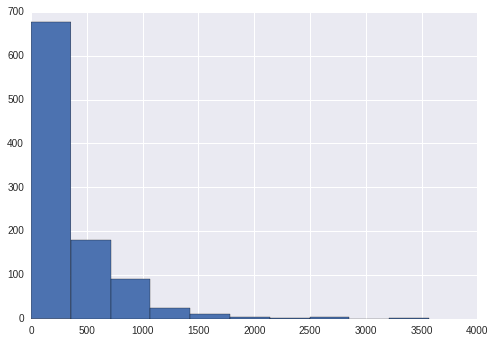

In [29]:
summarize(total_minutes_by_account)

## Debugging Data Analysis Code

In [30]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## 26 - Lessons Completed in First Week

In [31]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_lessons_by_account = sum_grouped_by_key(
    engagement_by_account, 
    'lessons_completed'
)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


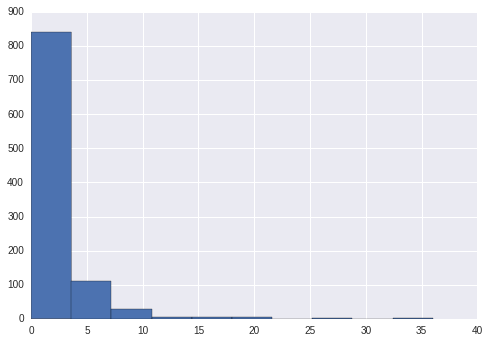

In [32]:
summarize(total_lessons_by_account)

## 28 - Number of Visits in the First Week

We want to analyze how many days did a student visit the class at all so we will add a `has_visted` field. 

In [33]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account = sum_grouped_by_key(
    engagement_by_account, 
    'has_visited'
)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


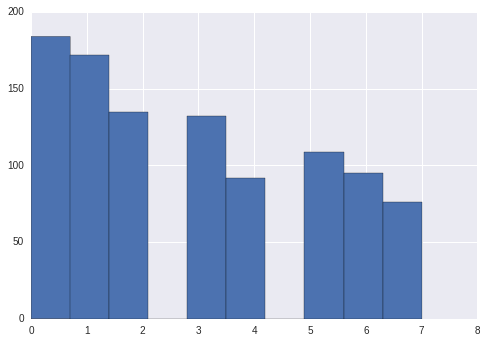

In [34]:
summarize(days_visited_by_account)

## Splitting out Passing Students

Now we get to the part where we are splitting the data into 2 parts - those who pass and those who don't pass. Then we will try and figure out what was the difference between their engagement.

In [35]:
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [36]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']


passing_submission = set()

for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and \
        submission['assigned_rating'] in ['PASSED', 'DISTINCTION']:
            passing_submission.add(submission['account_key'])

            
passing_engagement = []
non_passing_engagement = []
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in passing_submission:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print "Passing engagement is {}".format(len(passing_engagement))
print "Non Passing engagement is {}".format(len(non_passing_engagement))

Passing engagement is 4527
Non Passing engagement is 2392


## Comparing the Two Student Groups

In [37]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
passing_engagement_by_account = group_by(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_by(non_passing_engagement, 'account_key')

In [38]:
def summarize_data_for_key(data, key):
    by_key = sum_grouped_by_key(data, key)
    summarize(by_key)

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


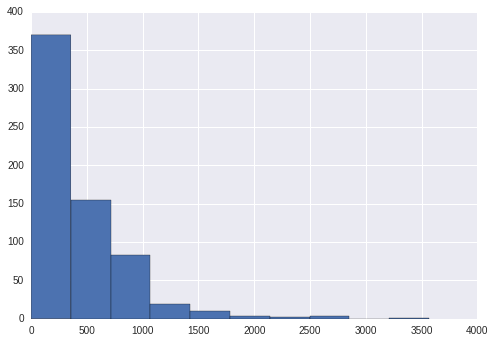

In [39]:
summarize_data_for_key(passing_engagement_by_account, 'total_minutes_visited')

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


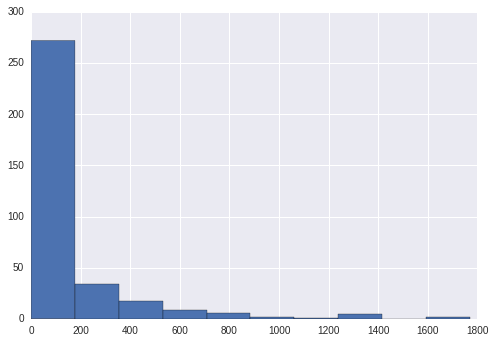

In [40]:
summarize_data_for_key(non_passing_engagement_by_account, 'total_minutes_visited')

We can see that the mean is much higher. We would expect passing students to be spending some more time compared to non passing students. The difference is 2.5 hours for non-passing vs. 6.5 hours for passing students

Let's now do a comparsion for `lessons_completed`

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


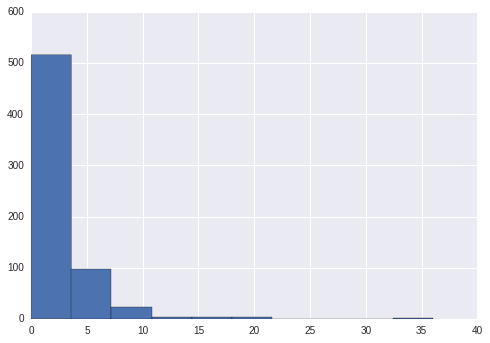

In [41]:
summarize_data_for_key(passing_engagement_by_account, 'lessons_completed')

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


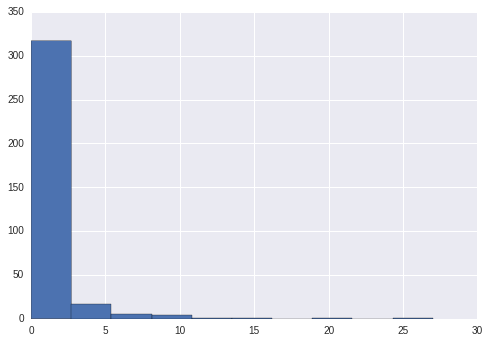

In [42]:
summarize_data_for_key(non_passing_engagement_by_account, 'lessons_completed')

Again we can see that the average is higher for students who passed.

Now let's see what kind of difference did visits had for passing vs non-passing students

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


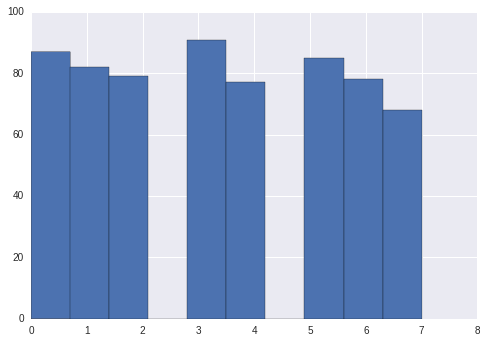

In [43]:
summarize_data_for_key(passing_engagement_by_account, 'has_visited')

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


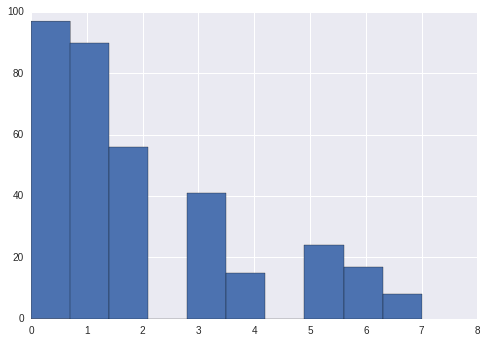

In [44]:
summarize_data_for_key(non_passing_engagement_by_account, 'has_visited')

Again the mean is higher.

Out of all of these the minutes spent seems to be most striking is the minutes spent.

But we need to understand that just spending higher time does not mean the student will pass. In other words we have just found a correlation between the two not causation. For ensuring causation we will need to use statistics.

There are many things which could be correlated but not actually cause causation. For example eating cheese is correlated with number of deaths by being tangled in bedsheets. Do you think one of these is causing the other?

![](correlation.png)

US spending on science, space and technology correlates with Suicides by hanging, strangulation and suffocation. Do you think one of these is causing the other?

![](correlation2.png)

There are many more for which you should visit [this website](http://tylervigen.com/spurious-correlations)

There could be other factors causing both of them or it may be just random.

For our case there could be many factors which cause passing projects and spending time
- Level of interest in Data Science
- Background knowledge in Programming, Statistics

To make sure that this is actually causation we need to run A/B Test. To learn more about using online experiments to determine whether one change causes another, take the Udacity course [A/B Testing](https://www.udacity.com/course/ab-testing--ud257).

## Making Histograms

In [45]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

### Making Predictions
- We may also want to find which students are most likely to pass their project based on the data that we have with us so far.

![](predictions.png)

### 38 - Communication
- which of your finding are most interesting
- how will you present them?

e.g.
- Number of minutes spent can be communicated simply by saying that on an average students who pass spent X hours more than the students who did not pass
- For the difference in days visited by the 2 groups showing histograms could be better

When sharing visualizations you should polish them and explain what trends you are observing in them

## Improving Plots and Sharing Findings
- You can add axis labels by using `plt.xlabel("Label for x axis")`. Similarly for y labels
- You can add title using `plt.title("Title of plot")`
- Just importing `seaborn` can improve your plots
- You'll also frequently want to add some arguments to your plot to tune how it looks. You can see what arguments are available on the documentation page for the hist function. One common argument to pass is the bins argument, which sets the number of bins used by your histogram. For example, `plt.hist(data, bins=20)` would make sure your histogram has 20 bins

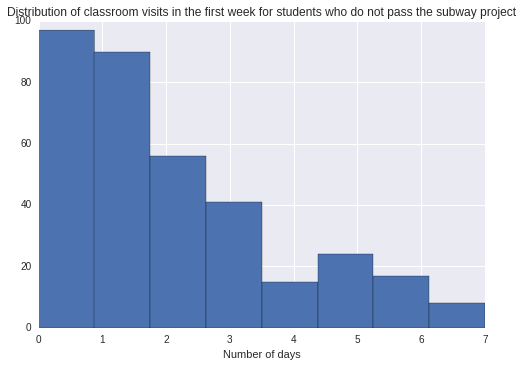

In [46]:
non_passing_visits = sum_grouped_by_key(non_passing_engagement_by_account, 'has_visited')

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

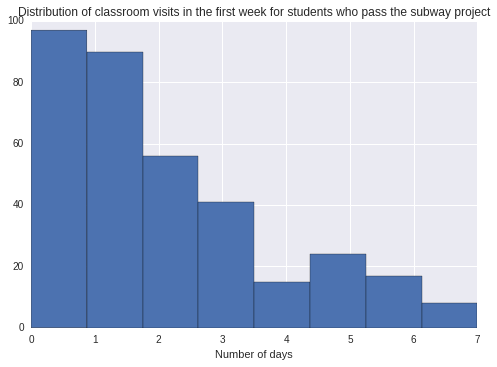

In [47]:
passing_visits = sum_grouped_by_key(non_passing_engagement_by_account, 'has_visited')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

## 40 - Data Analysis and Related Terms
Data Analysis vs. Data Science vs. Data Engineering vs. Big Data

Data Science
- Interchangeably used with Data Anlaysis
- More focused on building systems
- May require more experience

Data Engineering
- More focus on Data Wrangling phase 
    - Storage
    - Processing
- Make pipelines, ensure fault tolerant and scale better

Big Data
- Fuzzy term relates to "a lot" of data
- Any of data analysts, data scientists or engineer may work with Big data